In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

import pickle


In [4]:
df = pd.read_csv("C:\\Users\\JOHNPAUL\\Desktop\\Electric-Motor-Temperature-Prediction\Dataset\measures_v2.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\JOHNPAUL\AppData\Local\Temp\ipykernel_11084\3377499189.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:\\Users\\JOHNPAUL\\Desktop\\Electric-Motor-Temperature-Prediction\Dataset\measures_v2.csv")


,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


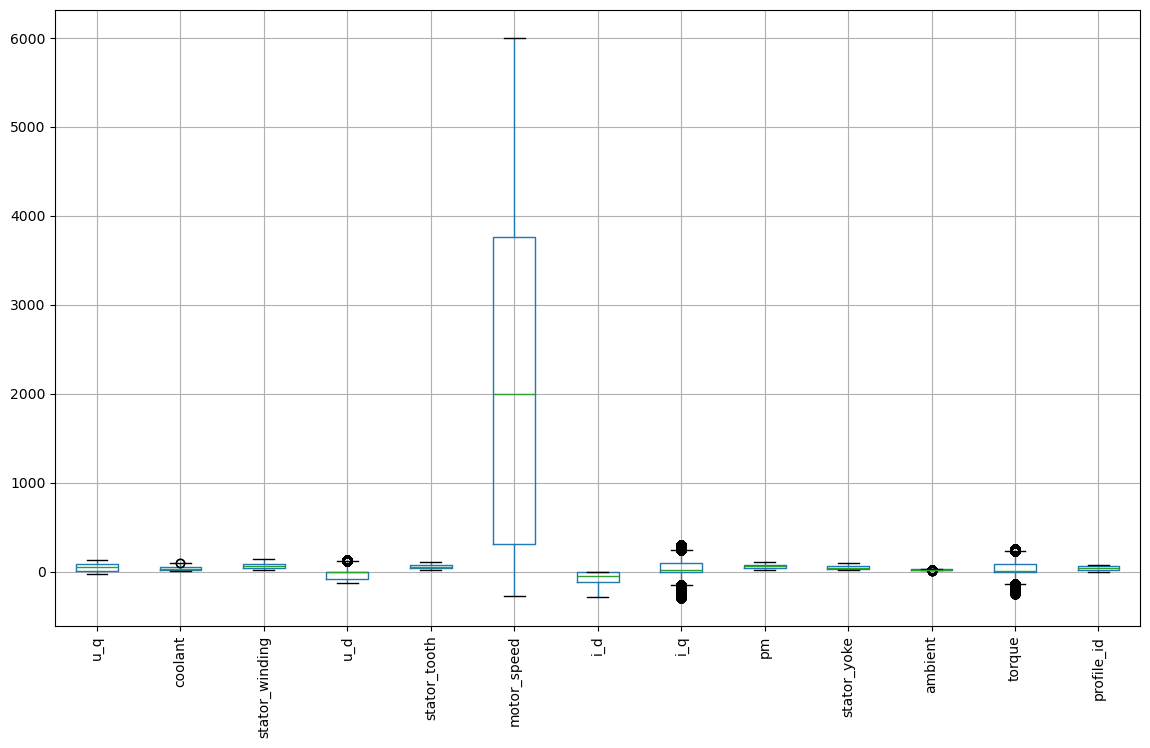

In [6]:
plt.figure(figsize=(14,8))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

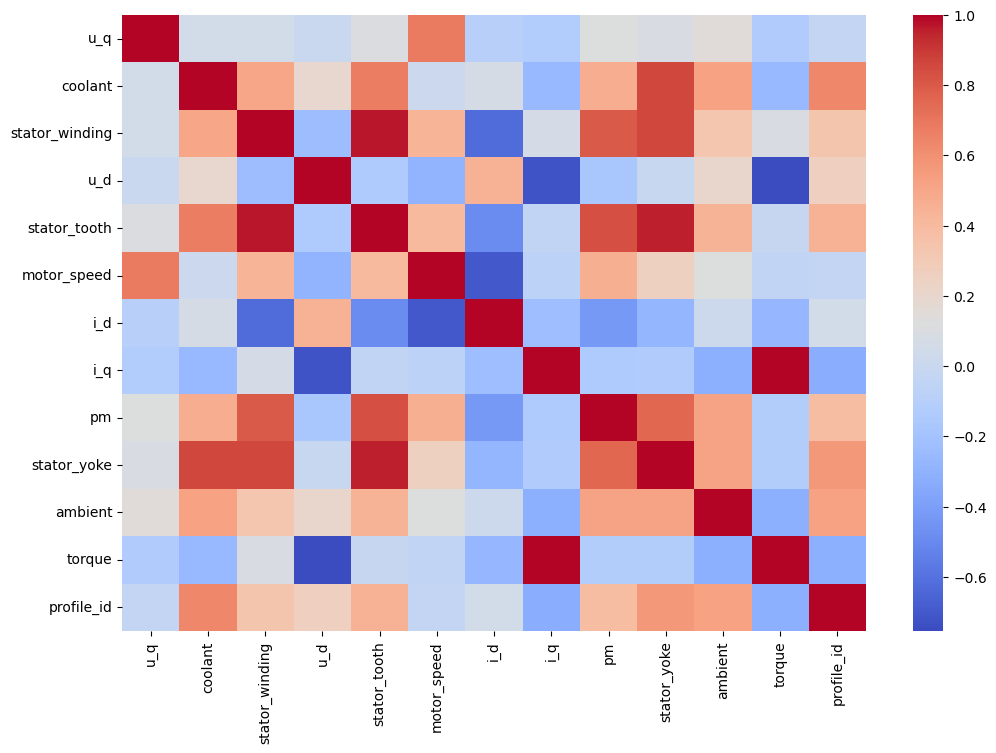

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()

In [8]:
df = df.drop(columns=["profile_id", "torque"])

In [9]:
X = df[
    [
        "ambient",
        "coolant",
        "u_d",
        "u_q",
        "motor_speed",
        "i_d",
        "i_q",
        "stator_yoke",
        "stator_winding"
    ]
]
y = df["pm"]

In [10]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pickle.dump(scaler, open("transform.save", "wb"))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [12]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1064652, 9) (266164, 9)
(1064652,) (266164,)


In [13]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"{name} → RMSE: {rmse:.4f}, R2: {r2:.4f}")
    return model, rmse, r2


In [14]:
lr_model, lr_rmse, lr_r2 = evaluate_model(
    LinearRegression(), "Linear Regression"
)

Linear Regression → RMSE: 7.9592, R2: 0.8246


In [15]:
dt_model, dt_rmse, dt_r2 = evaluate_model(
    DecisionTreeRegressor(random_state=42),
    "Decision Tree Regressor"
)

Decision Tree Regressor → RMSE: 0.7722, R2: 0.9983


In [16]:
rf_model, rf_rmse, rf_r2 = evaluate_model(
    RandomForestRegressor(
        n_estimators=20,  
        random_state=42,
        n_jobs=-1          
    ),
    "Random Forest Regressor"
)


Random Forest Regressor → RMSE: 0.5293, R2: 0.9992


In [17]:
results = pd.DataFrame({
    "Model": ["Linear", "Decision Tree", "Random Forest"],
    "RMSE": [lr_rmse, dt_rmse, rf_rmse],
    "R2 Score": [lr_r2, dt_r2, rf_r2]
})

results

,Model,RMSE,R2 Score
0,Linear,7.959247,0.824636
1,Decision Tree,0.772212,0.998349
2,Random Forest,0.529297,0.999224


In [18]:
with open("model.save", "wb") as f:
    pickle.dump(dt_model, f)

In [19]:
with open("transform.save", "wb") as f:
    pickle.dump(scaler, f)